# Principal Component Analysis

## Under the hood
Caution! Linear Algebra Ahead!

$$
 \begin{equation}
\underbrace{\mathbf{A}}_{W \times D} = \underbrace{\mathbf{U}}_{W \times W} \times \underbrace{\mathbf{\Sigma}}_{W\times D} \times \underbrace{\mathbf{V}^{\text{T}}}_{D \times D}
\end{equation}
$$

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
cancer = load_breast_cancer()

In [33]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data["label"] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
def compute_svd(data):
    val = data.drop("label",axis=1).values
    U, sigma, V = np.linalg.svd(val,full_matrices=False)
    return np.dot(U, np.diag(sigma))[:,:2]

In [35]:
dim2 = compute_svd(data)

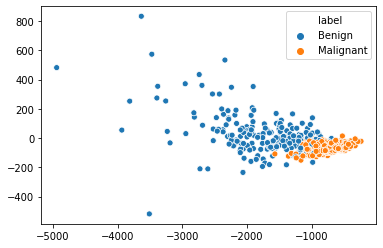

In [36]:
sns.scatterplot(dim2[:,0],dim2[:,1],hue = data.label.map({1:"Malignant", 0:"Benign"}))
